In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<ipython-input-21-47615e2fb029>:11: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


In [ ]:
print(train_df.head())

            team conf  GP  Min_per   Ortg   usg   eFG  TS_per  ORB_per  \
0  South Alabama   SB  26     29.5   97.3  16.6  42.5   44.43      1.6   
1       Utah St.  WAC  34     60.9  108.3  14.9  52.4   54.48      3.8   
2  South Florida   BE  27     72.0   96.2  21.8  45.7   47.98      2.1   
3     Pepperdine  WCC  30     44.5   97.7  16.0  53.6   53.69      4.1   
4        Pacific   BW  33     56.2   96.5  22.0  52.8   54.31      8.3   

   DRB_per  ...     dgbpm    oreb    dreb    treb     ast     stl     blk  \
0      4.6  ... -1.941150  0.1923  0.6154  0.8077  1.1923  0.3462  0.0385   
1      6.3  ... -0.247934  0.6765  1.2647  1.9412  1.8235  0.4118  0.2353   
2      8.0  ... -0.883163  0.6296  2.3333  2.9630  1.9630  0.4815  0.0000   
3      9.4  ... -0.393459  0.7000  1.4333  2.1333  1.1000  0.5667  0.1333   
4     18.6  ... -0.668318  1.4242  3.3030  4.7273  0.8485  0.4545  0.3333   

       pts                             player_id  drafted  
0   3.8846  b2716b2d-3422-4959-9

In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46618 entries, 0 to 46617
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 46618 non-null  object 
 1   conf                 46618 non-null  object 
 2   GP                   46618 non-null  int64  
 3   Min_per              46618 non-null  float64
 4   Ortg                 46618 non-null  float64
 5   usg                  46618 non-null  float64
 6   eFG                  46618 non-null  float64
 7   TS_per               46618 non-null  float64
 8   ORB_per              46618 non-null  float64
 9   DRB_per              46618 non-null  float64
 10  AST_per              46618 non-null  float64
 11  TO_per               46618 non-null  float64
 12  FTM                  46618 non-null  int64  
 13  FTA                  46618 non-null  int64  
 14  FT_per               46618 non-null  float64
 15  twoPM                46618 non-null 

In [ ]:
print(train_df.describe())

                 GP       Min_per          Ortg           usg           eFG  \
count  46618.000000  46618.000000  46618.000000  46618.000000  46618.000000   
mean      23.542988     37.339013     91.784360     18.164578     44.424392   
std       10.076829     28.019801     30.235568      6.181982     18.026404   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.000000      9.600000     83.900000     14.600000     40.000000   
50%       28.000000     35.900000     97.000000     18.100000     47.500000   
75%       31.000000     62.200000    106.800000     21.800000     53.000000   
max       41.000000     98.000000    834.000000     50.000000    150.000000   

             TS_per       ORB_per       DRB_per       AST_per        TO_per  \
count  46618.000000  46618.000000  46618.000000  46618.000000  46618.000000   
mean      47.571397      5.654071     12.575102     10.923008     20.535915   
std       17.217909      9.985025     11.041089    

In [ ]:
print(train_df.nunique())

team           355
conf            36
GP              41
Min_per        965
Ortg          1686
             ...  
stl           1110
blk           1175
pts           7004
player_id    20377
drafted          2
Length: 64, dtype: int64


In [ ]:
print(train_df.isnull().sum())

team          0
conf          0
GP            0
Min_per       0
Ortg          0
             ..
stl          36
blk          36
pts          36
player_id     0
drafted       0
Length: 64, dtype: int64


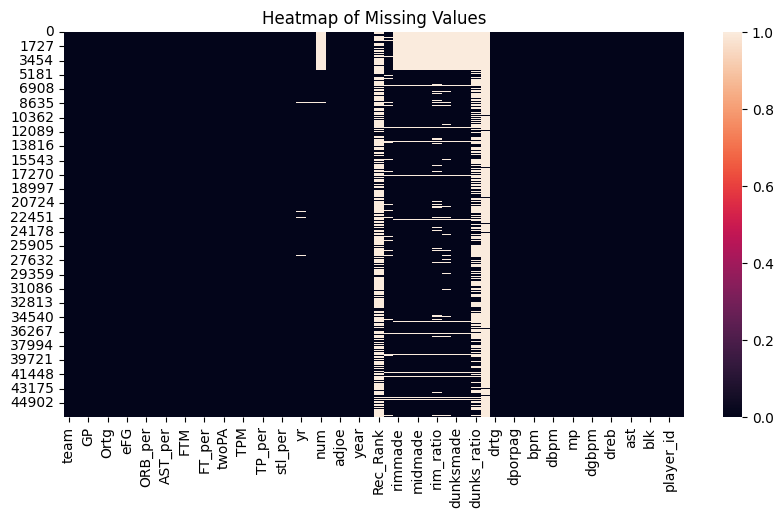

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull())
plt.title('Heatmap of Missing Values')
plt.show()

In [ ]:
train_df = train_df.drop(['pick'], axis=1)

In [ ]:
nan_percentage_each_row = train_df.isna().mean(axis=1) *100
print(nan_percentage_each_row)

0        17.460317
1        17.460317
2        17.460317
3        17.460317
4        17.460317
           ...    
46613     7.936508
46614     6.349206
46615    17.460317
46616     7.936508
46617     1.587302
Length: 46618, dtype: float64


In [ ]:
num_column = train_df.select_dtypes(include='number')
train_df[num_column.columns] = num_column.fillna(num_column.median())

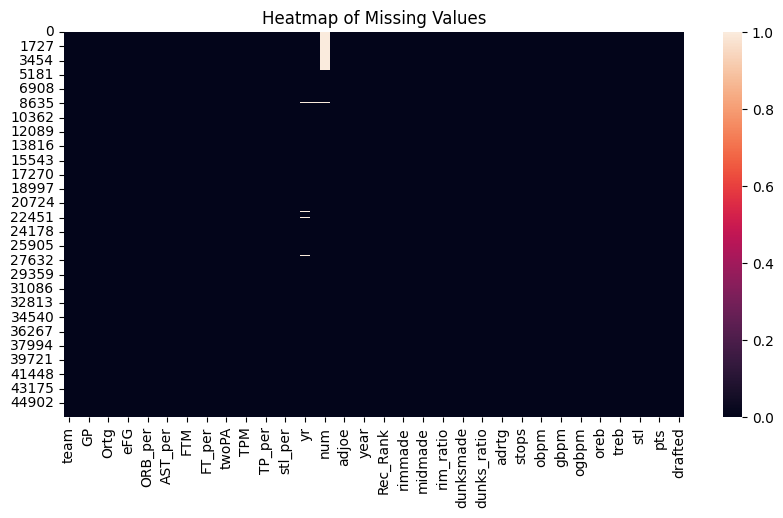

In [ ]:
#Double check missing values
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull())
plt.title('Heatmap of Missing Values')
plt.show()

In [ ]:
nan_percentage_each_row = train_df.isna().mean(axis=1) *100
print(nan_percentage_each_row)

0        1.587302
1        1.587302
2        1.587302
3        1.587302
4        1.587302
           ...   
46613    0.000000
46614    0.000000
46615    0.000000
46616    0.000000
46617    0.000000
Length: 46618, dtype: float64


In [ ]:
#Define features and target variable, distinguish the train and test variables
features = ['Ortg', 'eFG', 'bpm', 'stl', 'pts', 'GP', 'drtg', 'TS_per', 'AST_per', 'ORB_per',
    'DRB_per', 'Rec_Rank', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM',
    'TPA', 'TP_per', 'blk_per', 'stl_per', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
    'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
    'dunksmiss_dunksmade', 'dunks_ratio', 'porpag', 'adjoe', 'stops']

target = 'drafted'

X_train = train_df[features]
Y_train = train_df.loc[X_train.index, target]
X_test = test_df.drop(['player_id'],axis=1)

common_columns = X_train.columns.intersection(X_test.columns)
X_test = X_test[common_columns]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Removing the NaN values error - for grsdient boost
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
#Implement gradient boost
gb = GradientBoostingClassifier(n_estimators=100,random_state=42)
gb.fit(X_train,Y_train)
y_pred_prob = gb.predict_proba(X_test)[:, 1]

In [ ]:
#Export the CSV for Kaggle submission
player_id = test_df['player_id']
results = pd.DataFrame({
    'player_id': player_id,
    'drafted': y_pred_prob
})
#results.to_csv('rcf.csv', index=False)

Cross-validated AUROC: 0.9824561480525875


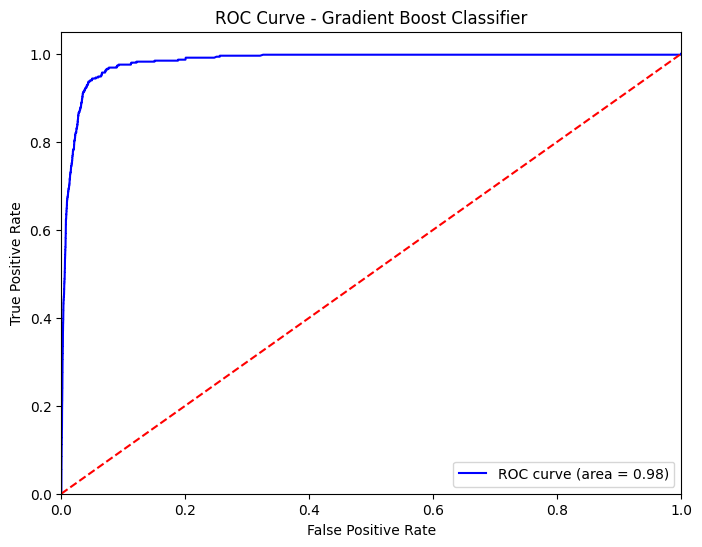

In [ ]:
y_pred_prob_cross_val = cross_val_predict(rcf, X_train, Y_train, cv=5, method='predict_proba')[:, 1]
roc_cross_val = roc_auc_score(Y_train, y_pred_prob_cross_val)
print('Cross-validated AUROC:', roc_cross_val)

fpr_cv, tpr_cv, _ = roc_curve(Y_train, y_pred_prob_cross_val)
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv, tpr_cv, color='blue', label='ROC curve (area = %0.2f)' % roc_cross_val)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boost')
plt.legend(loc='lower right')
plt.show()